In [2]:
import numpy as np

from hfnet.datasets.sfm import Sfm
from hfnet.evaluation.utils.keypoints import keypoints_warp_3D
from hfnet.evaluation.visualize import draw_keypoints
from utils import plot_images

%load_ext autoreload
%autoreload 2
%matplotlib inline

In [3]:
config = {'sequences': 'reichstag', 'make_pairs': True, 'shuffle': True, 'max_num_pairs': 0} 
dataset = Sfm(**config)
data = dataset.get_test_set()

[01/10/2019 15:16:55 INFO] SfM sequence reichstag contains 1841 pairs


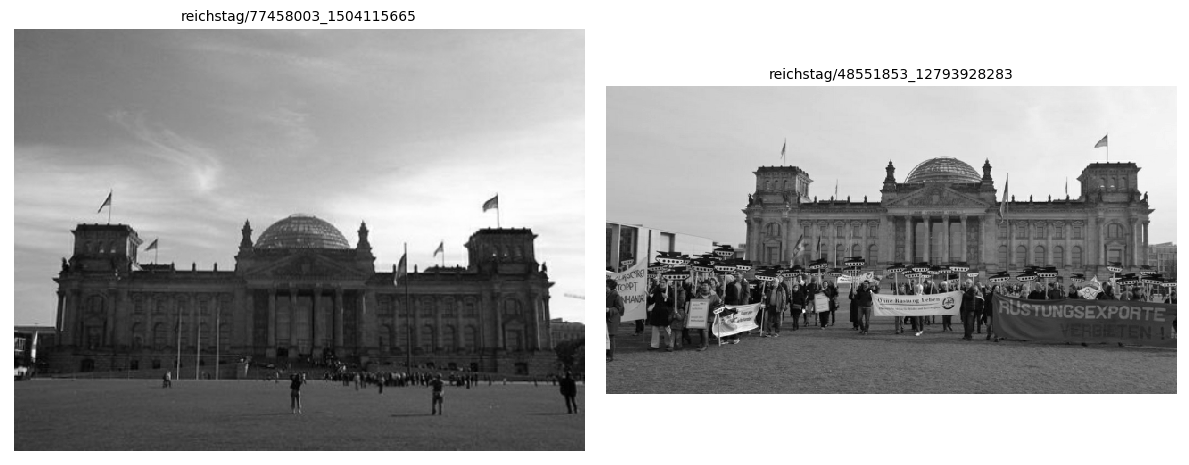

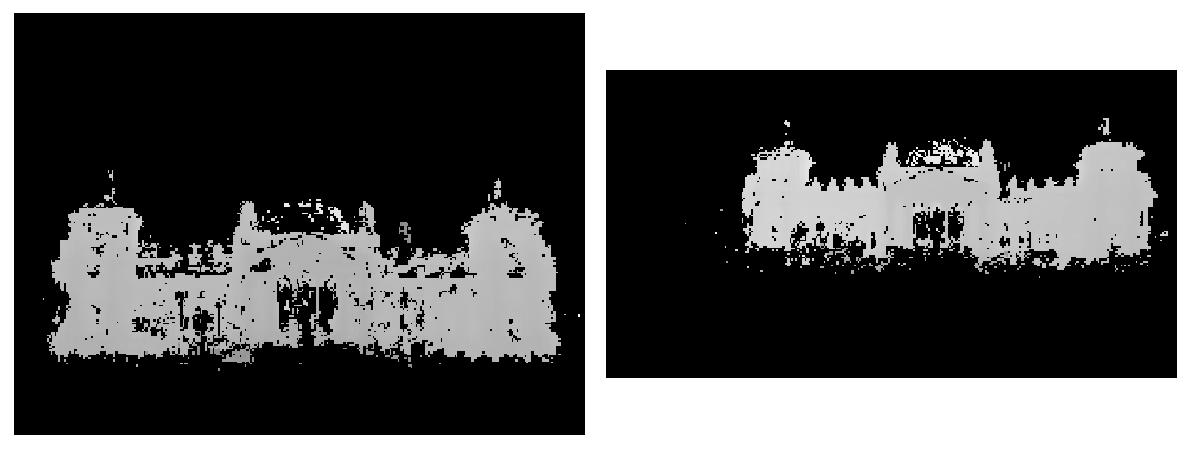

In [4]:
for _ in range(1):
    d = next(data)
    plot_images([d['image'], d['image2']],
              titles=[d['name'].decode('utf-8'), d['name2'].decode('utf-8')], normalize=True)
    plot_images([d['depth'], d['depth2']], normalize=True)

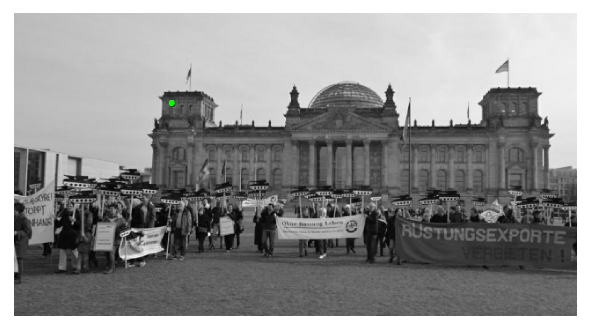

In [22]:
# Original keypoint
h, w = d['image2'].shape[:2]
kpts2 = np.array([[w*.28, h*0.3]])
plot_images([draw_keypoints(d['image2'], kpts2, radius=10)], normalize=True)

[[ 81.75370481 236.65718768]]


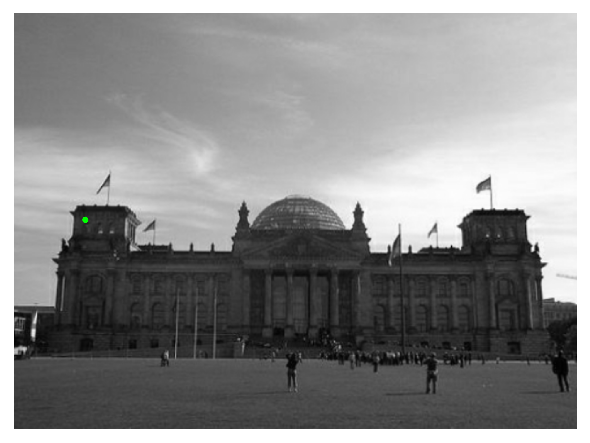

In [23]:
# Warp to the first image
kpts2_w, vis, kpts2_3d = keypoints_warp_3D(kpts2, d['depth2'], d['K2'], d['K'], d['1_T_2'], d['image'].shape[:2])
print(kpts2_w)
plot_images([draw_keypoints(d['image'], kpts2_w, radius=10)], normalize=True)

129.8417992270119


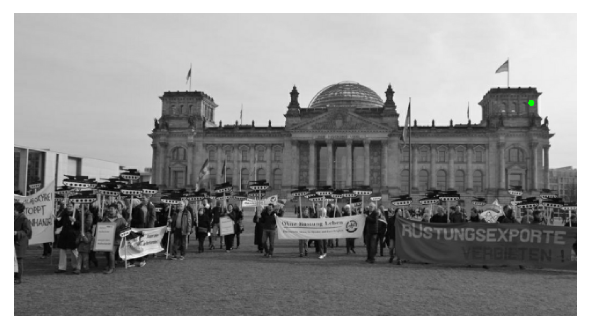

In [24]:
# Sample another point and check the distance in 3D
kpts2_second = np.array([[w*.92, h*0.3]])
plot_images([draw_keypoints(d['image2'], kpts2_second, radius=10)], normalize=True)
kpts2_3d_second = keypoints_warp_3D(kpts2_second, d['depth2'], d['K2'], d['K'], d['1_T_2'], d['image'].shape[:2])[2]
print(np.linalg.norm(kpts2_3d - kpts2_3d_second))  # Should match the measurement in Google Maps